In [32]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import pickle
import os
from datetime import datetime
import toolbox.utils as utils
from toolbox.encoder import Encoder

%matplotlib inline
sb.set()

le = Encoder()

In [48]:
df = pd.read_csv('data/covid_19_clean_complete.csv')
print(df.describe())

                Lat          Long    days_since      Confirmed        Deaths  \
count  24366.000000  24366.000000  24366.000000   24366.000000  24366.000000   
mean      21.433571     22.597991     46.000000    2153.252934    127.834565   
std       24.740928     70.570944     26.845786   20991.550147   1372.389014   
min      -51.796300   -135.000000      0.000000      -1.000000     -1.000000   
25%        7.000000    -19.020800     23.000000       0.000000      0.000000   
50%       23.659750     20.921188     46.000000       5.000000      0.000000   
75%       41.204400     81.000000     69.000000     165.000000      2.000000   
max       71.706900    178.065000     92.000000  869170.000000  49954.000000   

           Recovered  
count   24366.000000  
mean      528.564844  
std      4679.309813  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%        13.000000  
max    103300.000000  


In [4]:
confirmed_portugal = df.loc[df['Country/Region']=='Portugal'].groupby(['Date'], as_index=False)['Confirmed'].sum()
confirmed_portugal['Date'] = pd.to_datetime(confirmed_portugal['Date'])
confirmed_portugal = confirmed_portugal.sort_values(by='Date')
print(confirmed_portugal)

         Date  Confirmed
0  2020-01-22          0
1  2020-01-23          0
2  2020-01-24          0
3  2020-01-25          0
4  2020-01-26          0
..        ...        ...
80 2020-04-19      20206
82 2020-04-20      20863
83 2020-04-21      21379
84 2020-04-22      21982
85 2020-04-23      22353

[93 rows x 2 columns]


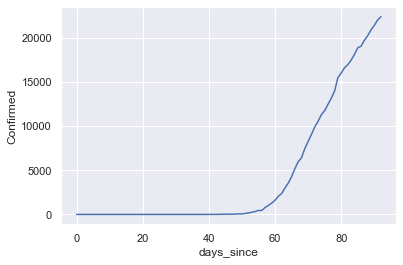

In [5]:
basedate = pd.Timestamp('2020-01-22')
confirmed_portugal['days_since'] = (confirmed_portugal['Date'] - basedate).dt.days

sb.lineplot(x='days_since', y='Confirmed', data=confirmed_portugal)

[Text(0, 0.5, 'Confirmed Cases'),
 Text(0.5, 0, 'Days since 2020-01-22'),
 Text(0.5, 1.0, 'Predicted vs Actual confirmed cases worldwide (KNeighbors)')]

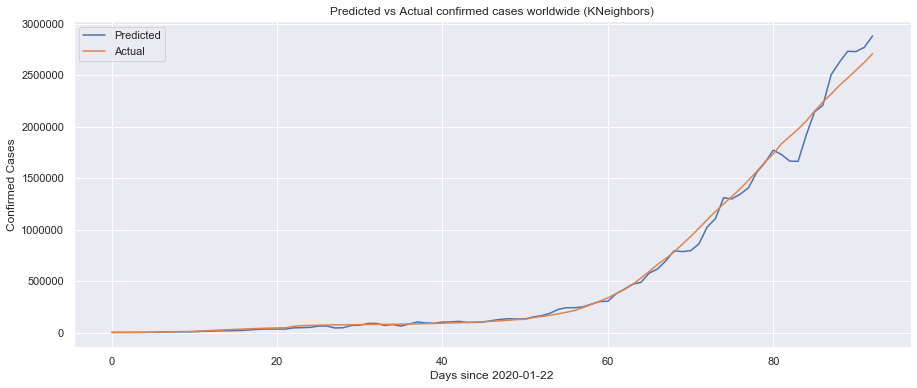

In [58]:
confirmed_actual = df.groupby(['days_since'], as_index=False)['Confirmed'].sum()
confirmed_actual = confirmed_actual.sort_values(by='days_since')

os.system('python3 -m toolbox predict data/covid_19_clean_test_confirmed.csv models/confirmed_kn.p Confirmed -o data/predict_confirmed_kn.csv')
confirmed_predicted = pd.read_csv('data/predict_confirmed_kn.csv')

confirmed_predicted = confirmed_predicted.groupby(['days_since'], as_index=False)['Confirmed'].sum()
confirmed_predicted = confirmed_predicted.sort_values(by='days_since')

fig = plt.figure(figsize=(15,6))
sb.lineplot(x='days_since', y='Confirmed', label='Predicted', data=confirmed_predicted)
ax = sb.lineplot(x='days_since', y='Confirmed', label='Actual', data=confirmed_actual)
ax.set(xlabel='Days since 2020-01-22', ylabel='Confirmed Cases', title='Predicted vs Actual confirmed cases worldwide (KNeighbors)')